In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

In [2]:
data = pd.read_pickle("../data/train.pickle")

In [3]:
X = data["features"].reshape(data["features"].shape[0], -1)
y = data["labels"]

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [4]:
def check_metrics(y_true, y_pred):
    """
    Выводит precision, recall, accuracy, f1
    """
    return {"Precision" : precision_score(y_true, y_pred, average='macro'), 
            "Recall" : recall_score(y_true, y_pred, average='macro'),
            "Accuracy" : accuracy_score(y_true, y_pred),
            "F1" : f1_score(y_true, y_pred, average='weighted')
            }

Решил глянуть именно эти метрики, потому что это +- классический набор, как я понимаю

precision отображает, сколько "positive preds" классификатор сделал верно;
recall отображает, сколько "positive cases" классификатор правильно обработал;
accuracy отображает, как часто классификатор ошибается;
f1 считает среднее гармоническое между precision и recall;


## Easy

Скачать датасет, обучить логистическую регрессию, измерить качество.

Текстом кратко обосновать какую метрику выбираем и почему такую.

Какой вид дорожных знаков модель путает чаще всего?



In [5]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)

/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
y_pred = clf.predict(x_test)
print(check_metrics(y_test, y_pred))

{'Precision': 0.9553665181745602, 'Recall': 0.9480706239978786, 'Accuracy': 0.9522988505747126, 'F1': 0.9523525051685707}


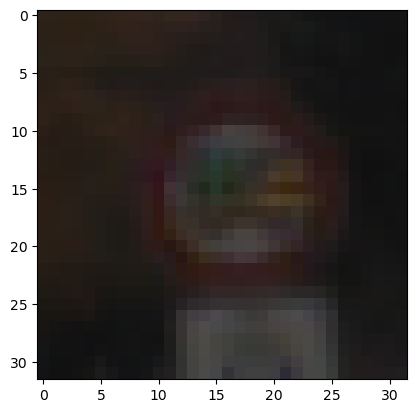

In [7]:
conf_matrix = confusion_matrix(y_pred, y_test)
wrong_predictions_per_class = np.sum(conf_matrix, axis=1) - np.diag(conf_matrix)
worst_recognized_class = np.argmax(wrong_predictions_per_class)
plt.imshow(data['features'][data['labels'] == worst_recognized_class][0], interpolation='nearest')
plt.show()

Хуже всего угадывается этот знак

я, честно, сам не понимаю, что это :)


## Medium

Обучить и сравнить между собой:

- логистическая регрессия
- kNN
- НБК
- SVM (попробовать 3 разных ядра)

Какая модель отработала лучше, а какая хуже всех?

Проинтерпретируйте почему худшая модель именно эта.

In [8]:
knn = KNeighborsClassifier()
gnb = GaussianNB()
svc_linear = SVC(kernel='linear')
svc_rbf = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly')

In [14]:
models = {
    'Logistic Regression': clf,
    'kNN': knn,
    'Naive Bayes': gnb,
    'svc_linear': svc_linear,
    'svc_rbf': svc_rbf,
    'svc_poly': svc_poly
}

In [15]:
for key, item in models.items():
    print(key)
    item.fit(x_train, y_train)

Logistic Regression


/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


kNN
Naive Bayes
svc_linear
svc_rbf
svc_poly


In [16]:
for key, model in models.items():
    y_pred = model.predict(x_test)
    metrics = check_metrics(y_test, y_pred)
    print(f"{key}:")
    print(metrics)

Logistic Regression:
{'Precision': 0.9553665181745602, 'Recall': 0.9480706239978786, 'Accuracy': 0.9522988505747126, 'F1': 0.9523525051685707}
kNN:
{'Precision': 0.8885699740177719, 'Recall': 0.8712383742183444, 'Accuracy': 0.87, 'F1': 0.8710889776858978}


/home/timur/.conda/envs/my-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes:
{'Precision': 0.34518453664570814, 'Recall': 0.23993189675676774, 'Accuracy': 0.1674712643678161, 'F1': 0.17577753804369628}
svc_linear:
{'Precision': 0.9490885229355427, 'Recall': 0.9554822866106684, 'Accuracy': 0.9573563218390805, 'F1': 0.9575754249934845}
svc_rbf:
{'Precision': 0.9250606920444835, 'Recall': 0.8314682689733347, 'Accuracy': 0.8679310344827587, 'F1': 0.8700271727037686}
svc_poly:
{'Precision': 0.8640305520997985, 'Recall': 0.6820214216044214, 'Accuracy': 0.7068965517241379, 'F1': 0.7469631826769358}


Лучше всего сработали логрег и svc с линейным ядром и rbf, так как, видимо есть линейная зависимость.

Самой неудачной моделью оказался наивный Байес из-за как раз таки своей наивности..) То есть из-за предположения о независимости или данные плохо распределены по классамч